<a href="https://colab.research.google.com/github/fardsnog2/ML_vvsu/blob/main/lab2/why_shovene.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание по практике 2

In [1]:
!pip install pandas
!pip install seaborn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Введение в описательную статистику

1. Выберите категориальную целевую переменную (**Y**)

2. Выберите переменную для анализа относительно категории (**X**)

3. Выведитие обобщенную статистическую информацию переменной (**X**)

2. Вычислите среднее, медиану, моду, минимум, максимум, стандартное отклонение относительно целевой пременной из файла Classification datasets в соответствии с вашим вариантом

3. Сделайте вывод относительно полученных результатов

p.s если у вас нет категориальных признаков - преобразуйте любой числовой в категориальный (https://pandas.pydata.org/docs/reference/api/pandas.cut.html). Важно **не** использовать преобразованный Y вместе с этим же X (то есть, если вы преобразовали возраст в категорию, то вы не моежет использовать возраст в качестве X и возраст категорию в качестве Y)

In [13]:
df = pd.read_csv('/content/predictive_maintenance.csv')
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [19]:
describe = df.describe()
describe

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [20]:
mean = df['Air temperature [K]'].mean()
mean

300.00493

In [21]:
median = df['Air temperature [K]'].median()
median

300.1

In [22]:
mode = df['Air temperature [K]'].mode()
mode

0    300.7
Name: Air temperature [K], dtype: float64

In [23]:
min = df['Air temperature [K]'].min()
min

295.3

In [24]:
max = df['Air temperature [K]'].max()
max

304.5

In [25]:
std = df['Air temperature [K]'].std()
std

2.000258682915751

Вычислите следующие квантили: 25%, 50% (медиана), 75% для числового признака вашего датасета. Затем найдите интерквартильный размах.

In [26]:
q1 = df['Air temperature [K]'].quantile(0.25)
q1

298.3

In [27]:
q2 = df['Air temperature [K]'].quantile(0.50)
q2

300.1

In [28]:
q3 = df['Air temperature [K]'].quantile(0.75)
q3

301.5

In [29]:
iqr = q3-q1
iqr

3.1999999999999886

Какие выводы можно сделать исходя из полученных статистических данных?

**Ответ здесь**

```
Видно что медиана и среднее отличается меньше чем на  0.01 значит у нас нормальное распределение
Если посмотреть на 3 * интерквартальный размах = 3*3.2 = 9.6 и медиану = 300.1
то можно сказать что у насу нас нет выбросов так как мин и макс находятся в пределах медиана +- 3 * интерквартальный размах
```


##Основы визуализации

 Постройте гистограмму переменной (X) относительно категориального признака (Y) из своего датасета.

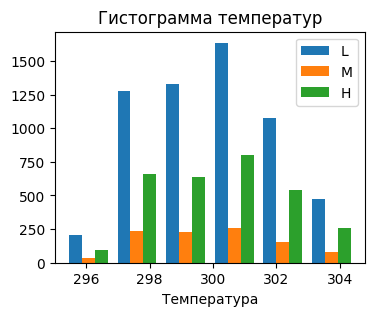

In [67]:
df_L = list(df[df['Type'] == 'L']['Air temperature [K]'])
df_M = list(df[df['Type'] == 'M']['Air temperature [K]'])
df_H = list(df[df['Type'] == 'H']['Air temperature [K]'])
type_e = ['L','M','H']
plt.figure(figsize=(4, 3))
plt.hist([df_L,df_H,df_M],bins=6,label=type_e)
plt.title('Гистограмма температур')
plt.xlabel('Температура')
plt.legend()

plt.show()

df.groupby('Type')Постройте boxplot любого признака из своего датасета.

1) boxplot числовой переменной;

2) boxplot числовой переменной относительно категориальный переменной;

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

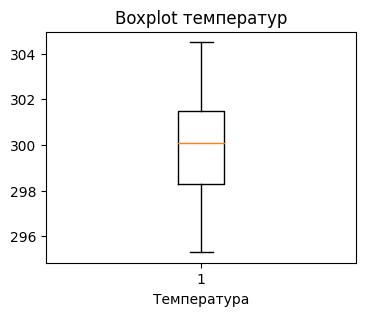

In [47]:
plt.figure(figsize=(4, 3))
plt.boxplot(df['Air temperature [K]'])
plt.title('Boxplot температур')
plt.xlabel('Температура')

plt.show()

<Axes: xlabel='Air temperature [K]', ylabel='Type'>

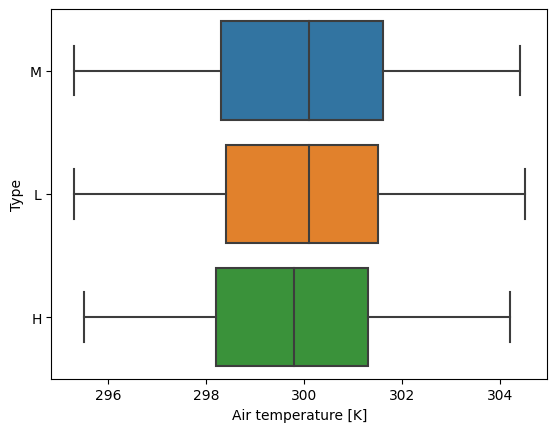

In [50]:


sns.boxplot(x='Air temperature [K]',
                y="Type",
                data=df)

Постройте диаграмму рассеивания для числовых признаков вашего датасета.

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

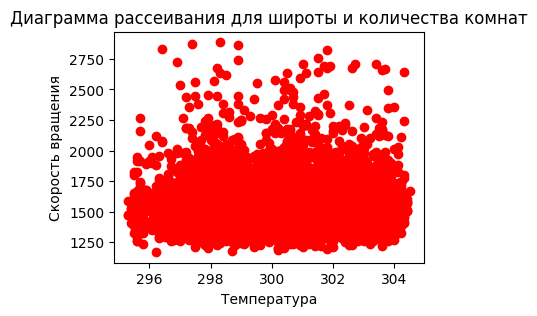

In [71]:

# Пример диаграммы рассеивания для возраста и роста
plt.figure(figsize=(4, 3))
plt.scatter(df['Air temperature [K]'], df['Rotational speed [rpm]'], color='red')
plt.title('Диаграмма рассеивания для широты и количества комнат')
plt.xlabel('Температура')
plt.ylabel('Скорость вращения')
plt.show()

Постройте матрицу корреляции для двух числовых признаков вашего датасета.

<Axes: >

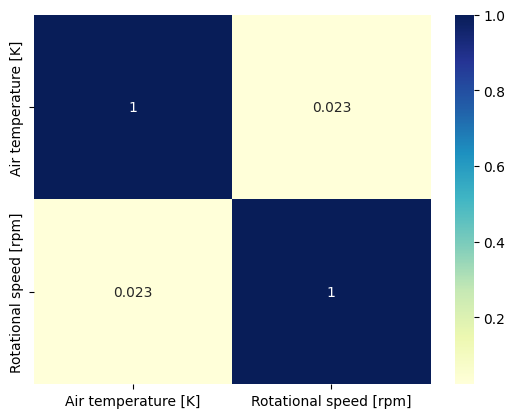

In [73]:
sns.heatmap(df[['Air temperature [K]','Rotational speed [rpm]']].corr(), cmap="YlGnBu", annot=True)

Какие выводы можно сделать на основе графиков и матрицы корреляции?

**Ответ здесь**
между двумя числовыми признаками нет корреляции так как коэф = 0.023 значит их можно использовать для обучения моедли(если надо)( по графику распределния видно так же что нет корреляции)

##Задание для гениев*

Реализовать следующие методы поиска выбросов:
1. На основе среднего и отклонения
2. Критерий Шовене
3. С помощью квартилей
4. Поиск выбросов по двум переменным

[Посмотреть](http://course.omgtu.ru/wp-content/uploads/2021/04/3_%D0%92%D1%8B%D0%B1%D1%80%D0%BE%D1%81%D1%8B.pdf)

P.S. в качестве возвразаемого значения методов может быть:
1. очищенный датафрейм
2. индексы выбросов ```df.series.index```

In [87]:
import math
import statistics as st
import numpy as np
from sympy import *
class shovene:
  def __init__(self, df):
    self.df = df

  def delete_by_shoven(self, column_name):
    data = df[column_name]
    mean_data = data.mean()
    std_mean = data.std()
    data = data.tolist()
    lst_index = []
    cnt_delete = 0
    while True and len(df) > 1:
      stop_iter = True
      for el in range(len(data)):
        if math.erfc (math.abs(data[el]-mean_data))/std_mean <(1/2/len(data)):
          lst_index.append(el)
          stop_iter = False
      if stop_iter:
            break




shovene(df['Rotational speed [rpm]'])

179.2840959134266


### Пример реализации одного метода

In [74]:
# как я понял это На основе среднего и отклонения
from statistics import median, mean

class Outline:
  def __init__(self, df):
    self.df = df

  def delete_outline_by_mean(self, column_name):
    mean_data = mean(self.df[column_name])
    maximum = mean_data * 2
    result = []

    for item in self.df[column_name]:
      if abs(item - mean_data) < maximum:
        result.append(item)

    return result



In [75]:
data = pd.DataFrame(
    data = {
        "col1": [1, 2, 3, 4, 5, 1000],
        "col2": [1, 2, 3, 2, 1, 4]
    }
)

so = Outline(data)
so.delete_outline_by_mean("col1")

[1, 2, 3, 4, 5]